In [31]:
# Imports

import pandas as pd
import numpy as np

from prophet import Prophet


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
bitcoin = pd.read_excel("crypto_data.xlsx", sheet_name = 'Bitcoin')
ethereum = pd.read_excel("crypto_data.xlsx", sheet_name = 'Ethereum')
dogecoin = pd.read_excel("crypto_data.xlsx", sheet_name = 'DogeCoin')

In [23]:
def forecast_prophet(df, periods=30):
    # prophet needs ds and y column
    df = df[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})
    df['ds'] = pd.to_datetime(df['ds'])
    df['y'] = df['y'].astype(float)

    # Remove any rows where 'y' is zero or NaN
    df = df[df['y'] > 0].dropna()

    model = Prophet()
    model.fit(df)

    future_df = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future_df)

    # Check the forecast columns
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))
    print(forecast.describe())

    # Plot without uncertainty intervals
    model.plot(forecast, uncertainty=False)
    return forecast


20:17:26 - cmdstanpy - INFO - Chain [1] start processing
20:17:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/paramjaswal/Desktop/Crypto Project/VirtualEnv/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/paramjaswal/Desktop/Crypto Project/VirtualEnv/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


          ds          yhat    yhat_lower    yhat_upper
0 2023-10-06  40070.753708  34461.656058  46271.422257
1 2023-10-07  40248.025108  34302.673794  46177.404838
2 2023-10-08  40412.319129  34638.259987  46774.653563
3 2023-10-09  40572.441857  34881.438131  46158.389941
4 2023-10-10  41510.310604  35596.926968  47350.588597
5 2023-10-11  40955.855254  35128.404205  46890.635318
6 2023-10-12  41502.915584  36100.949596  47530.231961
7 2023-10-13  41574.249833  35967.015874  47621.832413
8 2023-10-14  41751.521233  35884.521556  47774.322809
9 2023-10-15  41915.815254  35899.185904  48485.339979
                        ds         trend    yhat_lower    yhat_upper  \
count                  365    365.000000    365.000000    365.000000   
mean   2024-04-05 00:00:00  73973.372520  68070.616517  79903.982238   
min    2023-10-06 00:00:00  40108.876124  34302.673794  46158.389941   
25%    2024-01-05 00:00:00  57694.797505  51640.576147  63371.203242   
50%    2024-04-05 00:00:00  81535.7

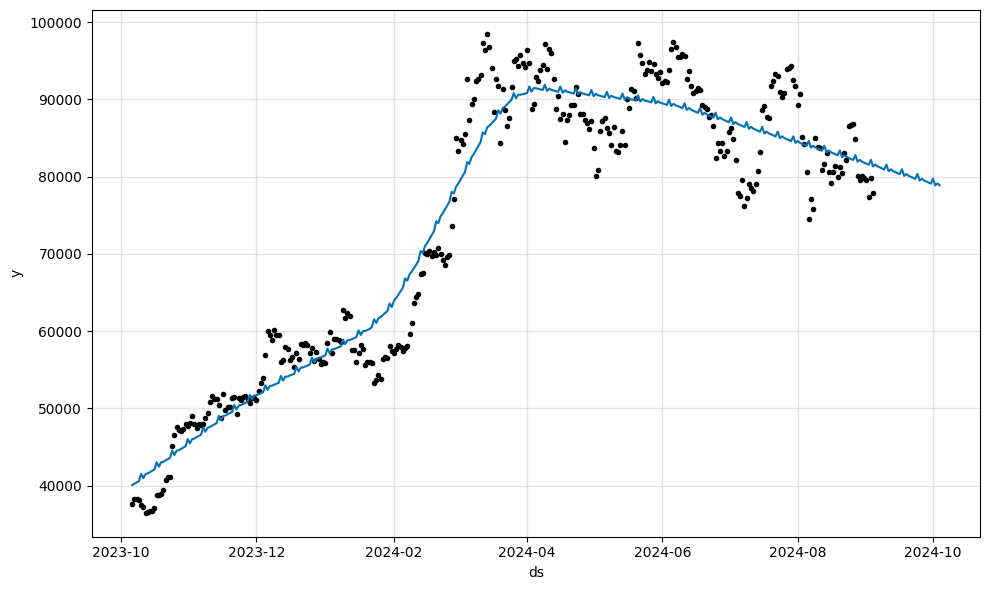

In [24]:
forecast_bitcoin = forecast_prophet(bitcoin, periods=30)

20:34:51 - cmdstanpy - INFO - Chain [1] start processing
20:34:51 - cmdstanpy - INFO - Chain [1] done processing
/Users/paramjaswal/Desktop/Crypto Project/VirtualEnv/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/paramjaswal/Desktop/Crypto Project/VirtualEnv/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


          ds         yhat   yhat_lower   yhat_upper
0 2023-10-06  2140.162759  1684.782510  2578.131494
1 2023-10-07  2133.459569  1692.826877  2558.832305
2 2023-10-08  2146.751382  1726.421179  2617.958881
3 2023-10-09  2164.461548  1744.894280  2584.724292
4 2023-10-10  2214.460004  1773.646443  2643.237483
5 2023-10-11  2179.468410  1731.875402  2615.431594
6 2023-10-12  2213.803335  1777.943756  2636.741649
7 2023-10-13  2224.645421  1816.510190  2666.187947
8 2023-10-14  2217.942231  1769.205705  2634.037533
9 2023-10-15  2231.234044  1773.832908  2692.993704
                        ds        trend   yhat_lower   yhat_upper  \
count                  365   365.000000   365.000000   365.000000   
mean   2024-04-05 00:00:00  3765.876221  3331.785461  4198.326104   
min    2023-10-06 00:00:00  2134.159860  1684.782510  2558.832305   
25%    2024-01-05 00:00:00  3135.882853  2689.290190  3572.865629   
50%    2024-04-05 00:00:00  3861.985474  3415.485522  4292.923222   
75%    2024-07

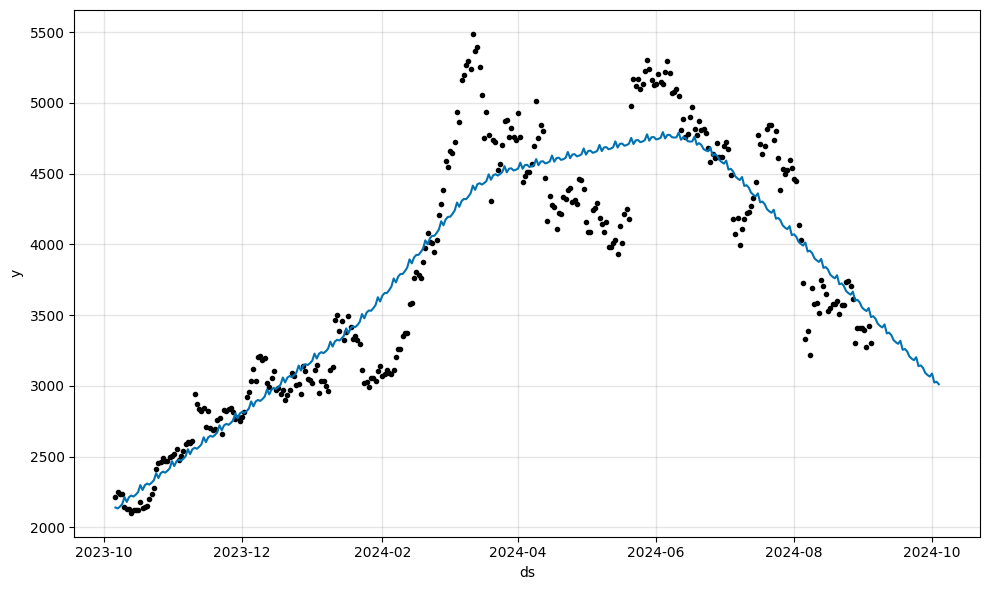

In [28]:
forecast_ethereum = forecast_prophet(ethereum, periods=30)

20:25:58 - cmdstanpy - INFO - Chain [1] start processing
20:25:58 - cmdstanpy - INFO - Chain [1] done processing
/Users/paramjaswal/Desktop/Crypto Project/VirtualEnv/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/paramjaswal/Desktop/Crypto Project/VirtualEnv/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


          ds      yhat  yhat_lower  yhat_upper
0 2023-10-06  0.087345    0.060011    0.112934
1 2023-10-07  0.087625    0.062316    0.115032
2 2023-10-08  0.088801    0.063199    0.115903
3 2023-10-09  0.089406    0.062076    0.114795
4 2023-10-10  0.091043    0.064456    0.118451
5 2023-10-11  0.087199    0.060536    0.114112
6 2023-10-12  0.088471    0.061752    0.116311
7 2023-10-13  0.089500    0.061171    0.115678
8 2023-10-14  0.089779    0.063151    0.116870
9 2023-10-15  0.090955    0.065469    0.118586
                        ds       trend  yhat_lower  yhat_upper  trend_lower  \
count                  365  365.000000  365.000000  365.000000   365.000000   
mean   2024-04-05 00:00:00    0.153083    0.126192    0.179791     0.152881   
min    2023-10-06 00:00:00    0.087632    0.060011    0.112934     0.087632   
25%    2024-01-05 00:00:00    0.115025    0.087668    0.141203     0.113794   
50%    2024-04-05 00:00:00    0.147420    0.119633    0.173666     0.147420   
75%    20

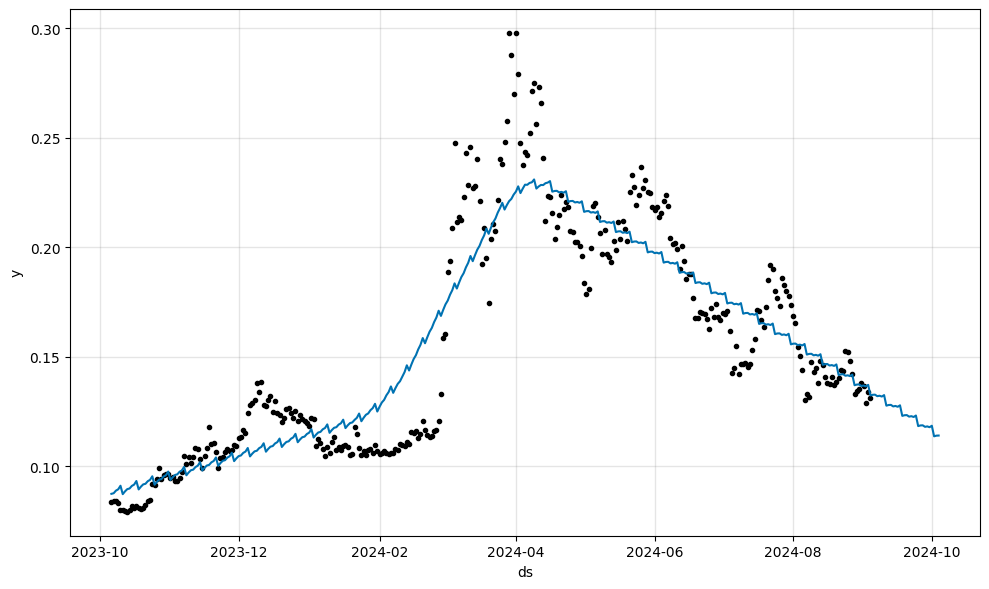

In [26]:
forecast_dogecoin = forecast_prophet(dogecoin, periods=30)

### READINGS

In [29]:
# Bitcoin:
# The forecast shows a strong upward trend reaching a peak, followed by a predicted decline. 
# The model captures the general trend well but shows significant volatility, 
# indicating that Bitcoin's price may experience corrections or stabilization after a period of growth.

In [30]:
# ethereum:
# Ethereum's price follows a similar pattern, with an initial rise and subsequent downturn.
# The forecast suggests that after a period of strong growth, 
# Ethereum may face a decline, with notable volatility around the predicted trend.

In [32]:
# Dogecoin:
# The model forecasts an early peak for Dogecoin, 
# followed by a prolonged downward trend. Like Bitcoin and Ethereum, 
# Dogecoin shows significant volatility, with the forecast indicating potential price corrections after its peak.

### Model Evaluation

In [33]:
def evaluate_forecast(actual, forecasted):
    mae = mean_absolute_error(actual, forecasted)
    rmse = np.sqrt(mean_squared_error(actual, forecasted))
    return mae, rmse

In [39]:
actual_bitcoin = bitcoin['price'].tail(30)
forecasted_bitcoin = forecast_bitcoin['yhat'].tail(30)
mae_bitcoin, rmse_bitcoin = evaluate_forecast(actual_bitcoin, forecasted_bitcoin)
print(f"Mean absolute Error : {mae_bitcoin} \nRoot Mean Squared Error : {rmse_bitcoin}")

Mean absolute Error : 2294.0620905746487 
Root Mean Squared Error : 3276.4473733472296


In [42]:
actual_ethereum = ethereum['price'].tail(30)
forecasted_ethereum = forecast_ethereum['yhat'].tail(30)
mae_ethereum, rmse_ethereum = evaluate_forecast(actual_ethereum, forecasted_ethereum)
print(f"Mean absolute Error : {mae_ethereum} \nRoot Mean Squared Error : {rmse_ethereum}")

Mean absolute Error : 305.9503529757305 
Root Mean Squared Error : 327.99497536256547


In [44]:
actual_dogecoin = dogecoin['price'].tail(30)
forecasted_dogecoin = forecast_dogecoin['yhat'].tail(30)
mae_dogecoin, rmse_dogecoin = evaluate_forecast(actual_dogecoin, forecasted_dogecoin)
print(f"Mean absolute Error : {rmse_dogecoin} \nRoot Mean Squared Error : {rmse_dogecoin}")

Mean absolute Error : 0.017439263942871975 
Root Mean Squared Error : 0.017439263942871975


In [41]:
# Given that the forecast model predicts future values (specifically for September 2024), hence it is done on the past 
# and since the actual data for September 2024 is not yet available, 
# we are unable to perform a direct comparison or evaluation of the model's accuracy for this period.

# In a real-world scenario, 
# once the actual data for September 2024 becomes available, 
# the forecasted values can be compared against the actual values to calculate evaluation metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). 

# For now, we acknowledge the limitation in evaluation and propose that future work should include this step once the actual data is available.